Dataset: https://data-flair.training/blogs/download-face-mask-data/

In [71]:
import tensorflow as tf

IMAGE_SIZE = (32, 32)
IMAGE_SHAPE = (32, 32, 1)
BATCH_SIZE = 10
EPOCHS = 10

TRAINING_DIR = './facemask-dataset/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=25,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        class_mode='sparse',
        subset='training',
        color_mode='grayscale')
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        class_mode='sparse',
        subset='validation',
        color_mode='grayscale')

VALIDATION_DIR = './facemask-dataset/test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        shuffle=False,
        class_mode='sparse',
        color_mode='grayscale')

Found 1185 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


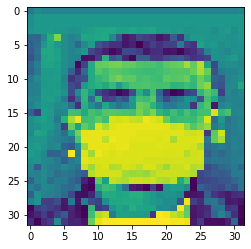

0.0


In [31]:
import matplotlib.pyplot as plt

%matplotlib inline

batch = test_generator.next()

image = batch[0][0]
label = batch[1][0]

plt.imshow(image)
plt.show()
print(label)

In [84]:
from tensorflow import keras
from tensorflow.keras import layers, models

DROPOUT = 0.1

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SHAPE))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(DROPOUT))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(DROPOUT))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(DROPOUT))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
          
model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)         

In [97]:
IMAGE_SIZE = (224, 224)
IMAGE_SHAPE = (224, 224, 3)
BATCH_SIZE = 10
EPOCHS = 10

TRAINING_DIR = './facemask-dataset/train'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=25,
        width_shift_range=0.25,
        height_shift_range=0.25,
        shear_range=0.25,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest',
        validation_split=0.1)
train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        class_mode='sparse',
        subset='training')
validation_generator = train_datagen.flow_from_directory(
        TRAINING_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        class_mode='sparse',
        subset='validation')

VALIDATION_DIR = './facemask-dataset/test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR, 
        batch_size=BATCH_SIZE, 
        target_size=IMAGE_SIZE,
        shuffle=False,
        class_mode='sparse')

pretrained_model = tf.keras.applications.NASNetMobile(
        include_top=False,
        weights='imagenet')

pretrained_model.trainable = False

model = models.Sequential()
model.add(pretrained_model)
model.add(layers.Dropout(DROPOUT))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(DROPOUT))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'])

model.summary()

Found 1185 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 7, 7, 1056)        4269716   
_________________________________________________________________
dropout_14 (Dropout)         (None, 7, 7, 1056)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 5, 5, 64)          608320    
_________________________________________________________________
batch_normalization_16 (Batc (None, 5, 5, 64)          256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 2, 2, 64)          0     

In [98]:
history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS)

Epoch 1/10
119/119 [==============================] - 121s 1s/step - loss: 0.3732 - accuracy: 0.9367 - val_loss: 0.3309 - val_accuracy: 0.9769
Epoch 2/10
119/119 [==============================] - 115s 964ms/step - loss: 0.3365 - accuracy: 0.9755 - val_loss: 0.3366 - val_accuracy: 0.9769
Epoch 3/10
119/119 [==============================] - 133s 1s/step - loss: 0.3463 - accuracy: 0.9646 - val_loss: 0.3141 - val_accuracy: 1.0000
Epoch 4/10
119/119 [==============================] - 122s 1s/step - loss: 0.3391 - accuracy: 0.9722 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 5/10
119/119 [==============================] - 147s 1s/step - loss: 0.3377 - accuracy: 0.9747 - val_loss: 0.3135 - val_accuracy: 1.0000
Epoch 6/10
119/119 [==============================] - 153s 1s/step - loss: 0.3347 - accuracy: 0.9789 - val_loss: 0.3313 - val_accuracy: 0.9846
Epoch 7/10
119/119 [==============================] - 159s 1s/step - loss: 0.3369 - accuracy: 0.9755 - val_loss: 0.3168 - val_accuracy: 1.0

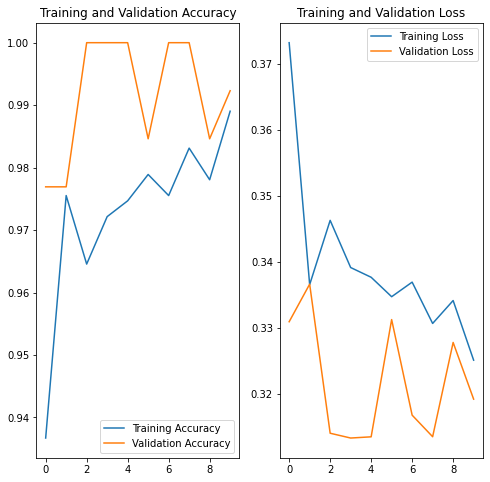

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Test Accuracy: 99.485 percent
Confusion Matrix:
 [[96  1]
 [ 0 97]]
False Positive Rate: 0.010 percent
False Negative Rate: 0.000 percent


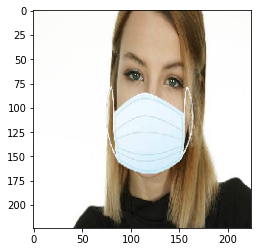

True Label: 0.0
Predicted Label: 0


In [100]:
import numpy as np

_, acc = model.evaluate(test_generator, verbose=0)
print('Test Accuracy: %.3f percent' % (acc * 100))

y_pred = np.argmax(model.predict(test_generator), axis=-1)
y_true = test_generator.labels

confusion_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

print('Confusion Matrix:\n', confusion_matrix)
print('False Positive Rate: %.3f percent' % normalized_confusion_matrix[0, 1])
print('False Negative Rate: %.3f percent' % normalized_confusion_matrix[1, 0])

image = test_generator.next()[0][0]
label = test_generator.next()[1][0]
prediction = np.argmax(model.predict(np.array([image])), axis=-1)[0]

plt.imshow(image)
plt.show()
print('True Label:', label)
print('Predicted Label:', prediction)